# nDGP emulator

In [2]:
from nDGPemu import BoostPredictor
import numpy as np
import matplotlib.pyplot as plt
from pkg_resources import resource_stream

# set matplotlib style
plt.style.use(resource_stream('nDGPemu','cache/my_style.py').name)

## Load the emulator

In [3]:
model = BoostPredictor()

Loading model and related data


/Users/fiorini/miniconda3/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/fiorini/miniconda3/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Estimate boost factor for example parameters and plot results

In [4]:
# Define parameters
cosmo_params = {'Om':0.32,
                'ns':0.96,
                'As':2.1e-9,
                'h':0.67,
                'Ob':0.048}

H0rc = 1
z = 0.507

# Get boost for training k values
Bk = model.predict(H0rc,z,cosmo_params)
k_vals = model.k_vals

# Get boost for custom k values
k_out = np.logspace(-1.5, 0.5, 10)
Bk_custom = model.predict(H0rc,z,cosmo_params, k_out)

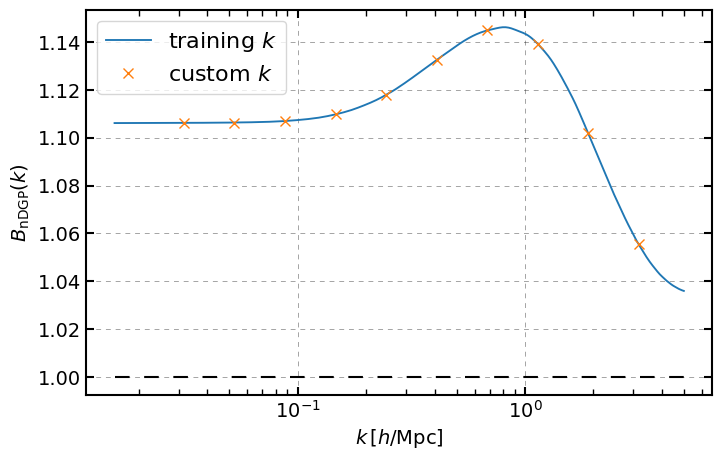

In [5]:
plt.semilogx(k_vals, Bk, label='training $k$')
plt.semilogx(k_out, Bk_custom, 'x', ms=7, label='custom $k$')
plt.xlabel(r'$k \, [h/{\rm Mpc}]$')
plt.ylabel(r'$B_{\rm nDGP}(k)$')
plt.hlines(1,k_vals.min(),k_vals.max(), 'k','--', lw=1.5);
plt.legend();